# Forest Fire Prediction using Machine learning

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('sample_data/forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [0]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Dataset Visualization
### Statistical Analysis of Dataset
Each column above describes the various statistics characteristics of the dataset. This is done to analyze the behavior of the dataset from statistical point of view.

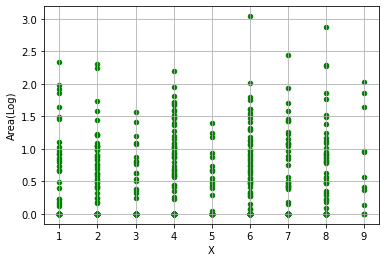

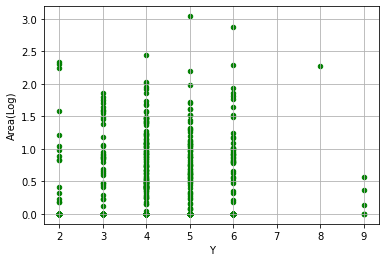

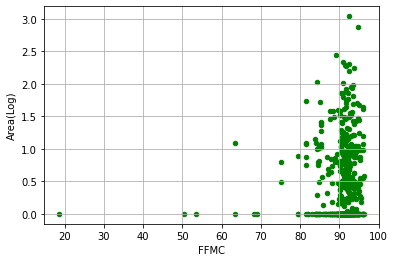

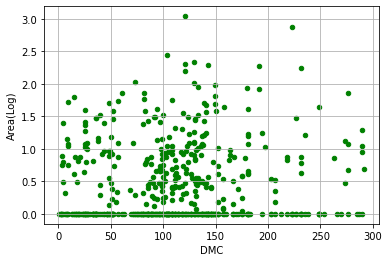

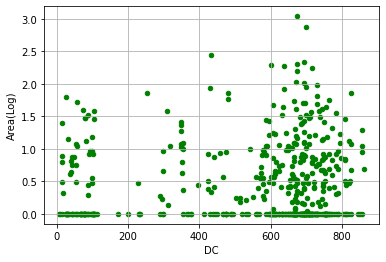

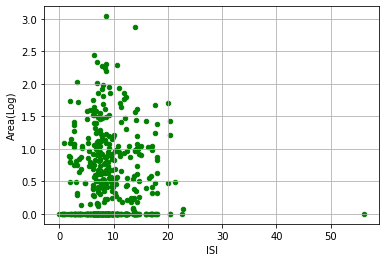

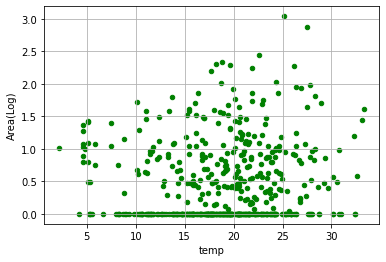

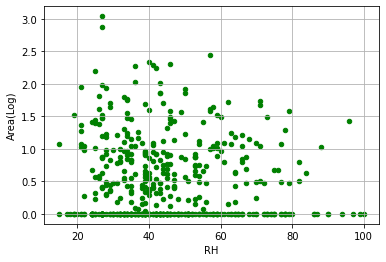

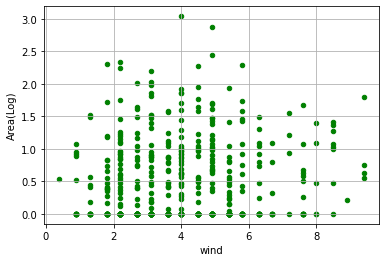

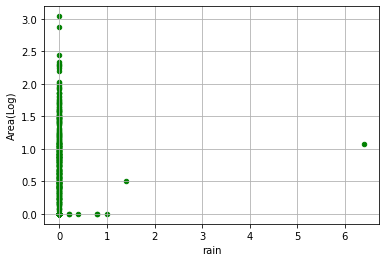

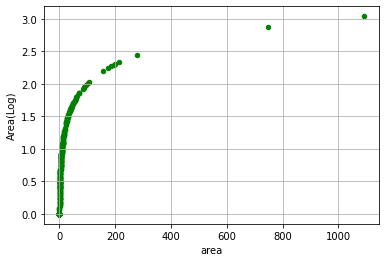

In [10]:
Area = df['area']
df['Area(Log)'] = np.log10(Area + 1)
#Plotting the data for visualization
for i in df.describe().columns[:-1]:
    df.plot.scatter(i,'Area(Log)',c='green',grid=True)



# Box PLots for Data on Day and Month basis

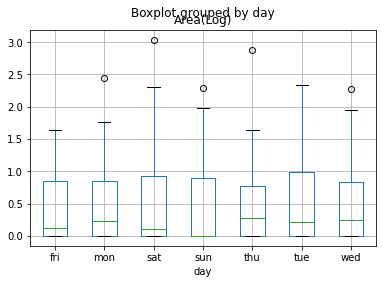

In [11]:
df.boxplot(column='Area(Log)',by='day')

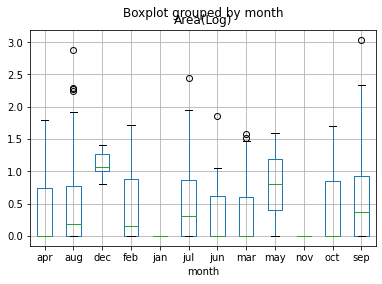

In [12]:
df.boxplot(column='Area(Log)',by='month')

## Data Preprocessing and Analysis

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

### Encoding data feature (Days and Months)

In [14]:
month = LabelEncoder()
month.fit(df['month'])
df['Encoded_month'] = month.transform(df['month'])
days = LabelEncoder()
days.fit(df['day'])
df['Encoded_days'] = days.transform(df['day'])
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Area(Log),Encoded_month,Encoded_days
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,7,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,10,5
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,10,2
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,7,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,7,3


## Generating training and testing data for model

In [0]:
# Generating data for training and testing
data = df.drop(['month','day','area','Area(Log)'],axis=1)
labels = df['Area(Log)']

In [0]:
#training/testing fraction
ratio = 0.3
data_train,data_test,labels_train,labels_test = train_test_split(data, labels, test_size=ratio)

## Support Vector Machine
Suppor vector machine is one of the most effective classifier in Machine learning. But our problem is purely realted to regression. For this scenario we can use SVM as a SVR (Support Vector Regressor). It differ from SVM in a sense that the output is a real number it can be predicted. But in case of regression there need to be define a tolerance level to model the possibilities with a line. Thus we have to decide a margin of error. But as the problem is same that we have to minimize the error. SVR gives us the opportunity to tuning the tolerance to accept the possible error rate.

### Tuning Parameter of Model
In order to train the model we need a certain parameters that need to be adjusted. One method is to do it by hit and trial and the other one is to use the grid search method to find the exact parameter which is time efficient. Scikit learn provide the GridSearchCV functionality to find the parameters.

In [0]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [0]:
scaler = StandardScaler()
# Grid parameter for GridSearchCV
param_grid = {'C': [0.01,0.1,1, 10], 'epsilon': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [19]:
labels_train = labels_train.values.reshape(labels_train.size,1)
grid_SVR = GridSearchCV(SVR(),param_grid,refit=True,verbose=0,cv=5)
grid_SVR.fit(scaler.fit_transform(data_train),scaler.fit_transform(labels_train))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'epsilon': [10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
print("Parameters provided by GridSearchCV",grid_SVR.best_params_)

Parameters provided by GridSearchCV {'C': 0.01, 'epsilon': 1, 'kernel': 'rbf'}


In [0]:
area=grid_SVR.predict(data_test)

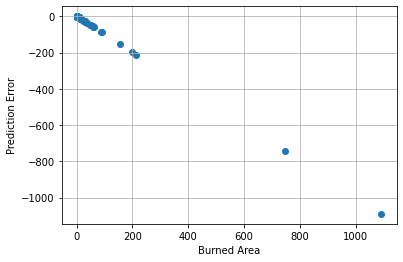

In [22]:
plt.xlabel("Burned Area")
plt.ylabel("Prediction Error")
plt.grid(True)
plt.scatter(10**(labels_test),10**(area)-10**(labels_test))

In [0]:
# REC function for plotting REC curve
def REC(mem,num,toler):
    if type(mem)!='numpy.ndarray':
        mem=np.array(mem)
    if type(num)!='numpy.ndarray':
        num=np.array(num)
    l=mem.size
    percent = 0
    for i in range(l):
        if np.abs(10**mem[i]-10**num[i])<=toler:
            percent+=1
    return 100*(percent/l)
max_toll = 20

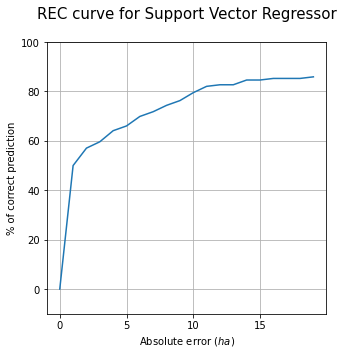

In [24]:

REC_SVR=[]
for i in range(max_toll):
    REC_SVR.append(REC(area,labels_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for Support Vector Regressor\n",fontsize=15)
plt.xlabel("Absolute error ($ha$)")
plt.ylabel("% of correct prediction")
plt.xticks([i*5 for i in range(max_toll+1)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(max_toll),REC_SVR)

# Using Random Forest Regression model

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
para = {'max_depth': [5,15,15,20,60], 'max_leaf_nodes': [3,5,20], 'min_samples_leaf': [3,5,20],
             'min_samples_split':[3,5,20]}
RF_grid = GridSearchCV(RandomForestRegressor(),para,refit=True,verbose=0,cv=6)
RF_grid.fit(data_train,labels_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=6, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [41]:
print("parameters obtained")
print(RF_grid.best_params_)

parameters obtained
{'max_depth': 5, 'max_leaf_nodes': 3, 'min_samples_leaf': 3, 'min_samples_split': 5}


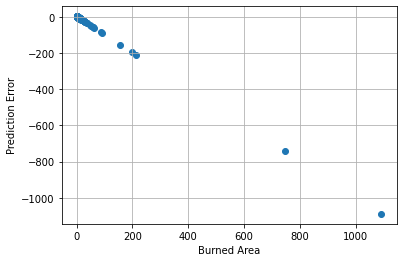

In [45]:
area=RF_grid.predict(data_test)
rmse_rf=np.sqrt(np.mean((labels_test-area)**2))

plt.xlabel("Burned Area")
plt.ylabel("Prediction Error")
plt.grid(True)
plt.scatter(10**(labels_test),10**(area)-10**(labels_test))

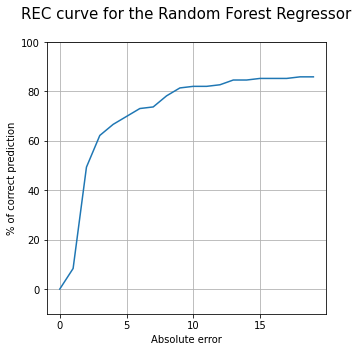

In [47]:
REC_RF=[]
for i in range(max_toll):
    REC_RF.append(REC(area,labels_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Random Forest Regressor\n",fontsize=15)
plt.xlabel("Absolute error")
plt.ylabel("% of correct prediction")
plt.xticks([i for i in range(0,max_toll+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(max_toll),REC_RF)

## Using Deep Learning (Neural Network)
Now the problem is solved using Neural Network Approach. 
Deep Neural Network(DNN) is artificial neural network having multiple layers between input and output. DNN using different algorithms to find the correct mathematical manipulation to map input to output. This relationship can be either linear and non-linear in nature.

In [25]:
from keras.models import Sequential
import keras.optimizers as opti
from keras.layers import Dense, Activation,Dropout

Using TensorFlow backend.


## Layers of Neural Network

In [26]:

model = Sequential()
model.add(Dense(100, input_dim=12))
model.add(Activation('selu'))
model.add(Dropout(0.3))
model.add(Dense(100))
model.add(Dropout(0.3))
model.add(Activation('selu'))
model.add(Dense(50))
model.add(Activation('elu'))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1300      
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)               

In [0]:

learning_rate=0.001
optimizer = opti.RMSprop(lr=learning_rate)
model.compile(optimizer=optimizer,loss='mse')

In [30]:
model.fit(data_train, labels_train, epochs=100, batch_size=10,verbose=0)

In [0]:
area=model.predict(data_test)

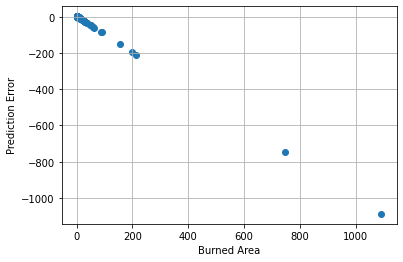

In [32]:
plt.xlabel("Burned Area")
plt.ylabel("Prediction Error")
plt.grid(True)
plt.scatter(10**(labels_test),10**(area.reshape(area.size,))-10**(labels_test))

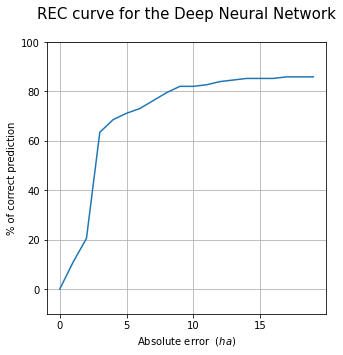

In [33]:
REC_NN=[]
for i in range(max_toll):
    REC_NN.append(REC(area,labels_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Deep Neural Network\n",fontsize=15)
plt.xlabel("Absolute error  ($ha$)")
plt.ylabel("% of correct prediction")
plt.xticks([i for i in range(0,max_toll+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(max_toll),REC_NN)

## Using Decision Tree Regressor to solve the problem

In [0]:

from sklearn.tree import DecisionTreeRegressor

In [0]:
dec_tree = DecisionTreeRegressor(max_depth=10,criterion='mae')
dec_tree.fit(scaler.fit_transform(data_train),scaler.fit_transform(labels_train))

area=dec_tree.predict(data_test)


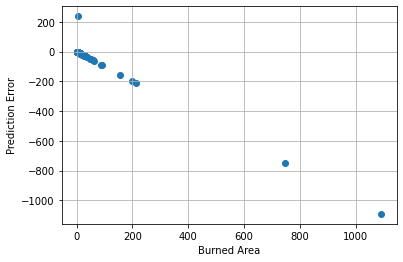

In [36]:
plt.xlabel("Burned Area")
plt.ylabel("Prediction Error")
plt.grid(True)
plt.scatter(10**(labels_test),10**(area)-10**(labels_test))

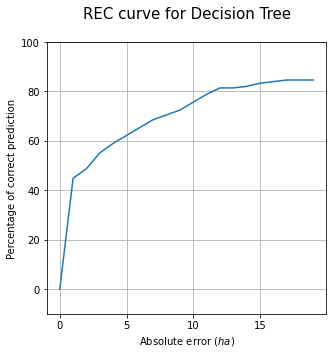

In [37]:
REC_DT=[]
for i in range(max_toll):
    REC_DT.append(REC(area,labels_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for Decision Tree\n",fontsize=15)
plt.xlabel("Absolute error ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0,max_toll+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(max_toll),REC_DT)

## Performance comparison of various models using REC method

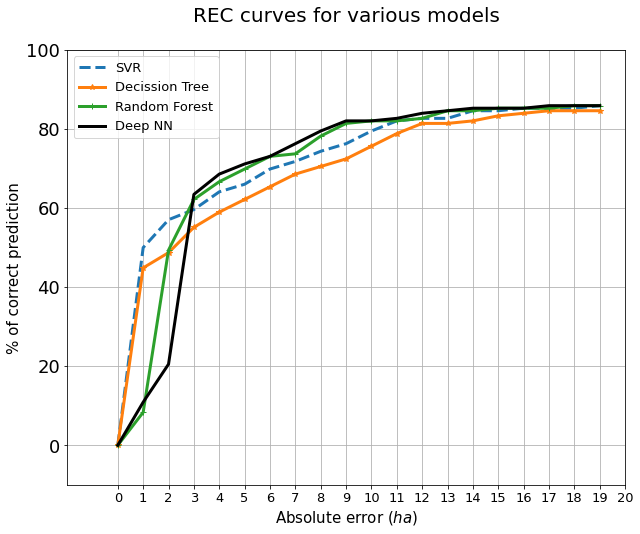

In [48]:
plt.figure(figsize=(10,8))
plt.title("REC curves for various models\n",fontsize=20)
plt.xlabel("Absolute error ($ha$)",fontsize=15)
plt.ylabel("% of correct prediction",fontsize=15)
plt.xticks([i for i in range(0,max_toll+1,1)],fontsize=13)
plt.ylim(-10,100)
plt.xlim(-2,max_toll)
plt.yticks([i*20 for i in range(6)],fontsize=18)
plt.grid(True)
plt.plot(range(max_toll),REC_SVR,'--',lw=3)
plt.plot(range(max_toll),REC_DT,'*-',lw=3)
plt.plot(range(max_toll),REC_RF,'+-',lw=3)
plt.plot(range(max_toll),REC_NN,'k-',lw=3)
plt.legend(['SVR','Decission Tree','Random Forest','Deep NN'],fontsize=13)